### Install and Import Packages

In [64]:
#Install necessary packages

%pip install keras_vggface
%pip install keras_applications
%pip install opencv-python
%pip install tensorflow
%pip install pandas

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` befor

In [65]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
import torch as torch
import numpy as np

import cv2
import os
import numpy as np
import pickle

from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras_vggface import utils

from transformers import CLIPProcessor, CLIPModel


import keras.utils as image


### Load training labels and noun list

In [66]:

# load the training labels
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, "rb") as \
    f: class_dictionary = pickle.load(f)

class_list = [value for _, value in class_dictionary.items()]
print(class_list)

# load list of 73 nouns 
import csv

with open('nouns.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

data = [line[0] for line in data]

nouns = ['a photo of a ' + s for s in data]

print(nouns)

['Angela', 'Dwight', 'Jim', 'Kevin', 'Michael', 'Pam']
['a photo of a window', 'a photo of a water', 'a photo of a university', 'a photo of a tv', 'a photo of a trophy', 'a photo of a tree', 'a photo of a train', 'a photo of a Toilet', 'a photo of a theatre', 'a photo of a television', 'a photo of a telephone', 'a photo of a table', 'a photo of a street', 'a photo of a stapler', 'a photo of a snow', 'a photo of a sea', 'a photo of a road', 'a photo of a railway', 'a photo of a proposal', 'a photo of a phone', 'a photo of a party', 'a photo of a park', 'a photo of a paper', 'a photo of a office', 'a photo of a night', 'a photo of a newspaper', 'a photo of a museum', 'a photo of a mug', 'a photo of a money', 'a photo of a mirror', 'a photo of a milk', 'a photo of a manager', 'a photo of a machine', 'a photo of a lunch', 'a photo of a library', 'a photo of a kitchen', 'a photo of a house', 'a photo of a hotel', 'a photo of a hospital', 'a photo of a group', 'a photo of a garden', 'a photo

### Load models

In [67]:
from tensorflow.keras.models import load_model

# pretrained clip model and processor for object detection
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# custom transfer model for detecting characters
face_model = load_model(
    'transfer_learning_trained' +
    '_the_office_cnn_model.h5')

# pretrained model to detect faces
facecascade =  cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


### Detect faces and objects in the test images

../Data/Test_Images/Test_Image_3.jpeg


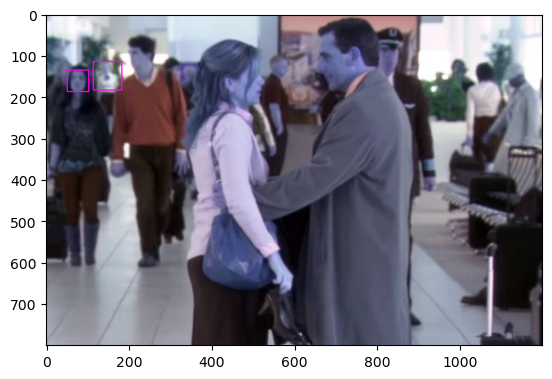

[]
['company', 'stapler', 'manager', 'Copier', 'office']
../Data/Test_Images/Test_Image_11.jpeg
1/1 [==============================] - 0s 14ms/step


2022-12-08 23:14:37.286673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


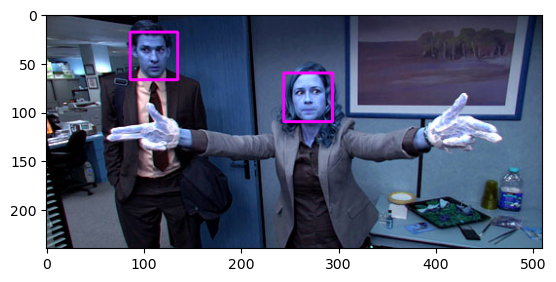

['Jim', 'Pam']
['company', 'manager', 'computer', 'office', 'Copier']
../Data/Test_Images/Test_Image_8.jpg
1/1 [==============================] - 0s 17ms/step


['Kevin']
['hospital', 'company', 'Copier', 'manager', 'office']
../Data/Test_Images/Test_Image_10.jpeg


[]
['tv', 'television', 'computer', 'Copier', 'office']
../Data/Test_Images/Test_Image_9.jpeg
1/1 [==============================] - 0s 15ms/step


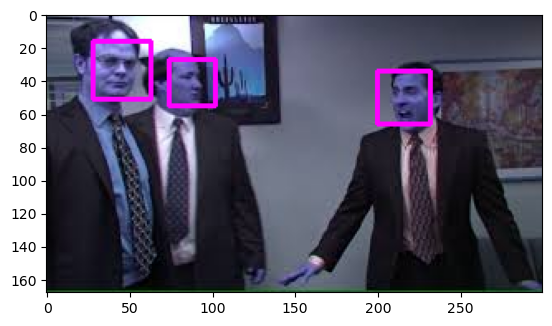

['Jim', 'Dwight', 'Kevin']
['game', 'company', 'office', 'Copier', 'manager']
../Data/Test_Images/test_image_17.jpeg
1/1 [==============================] - 0s 13ms/step


['Pam']
['stapler', 'office', 'manager', 'desk', 'hospital']
../Data/Test_Images/Test_Image_4.jpeg
1/1 [==============================] - 0s 12ms/step


['Dwight']
['manager', 'Copier', 'desk', 'stapler', 'office']
../Data/Test_Images/Test_Image_8.jpeg
1/1 [==============================] - 0s 12ms/step


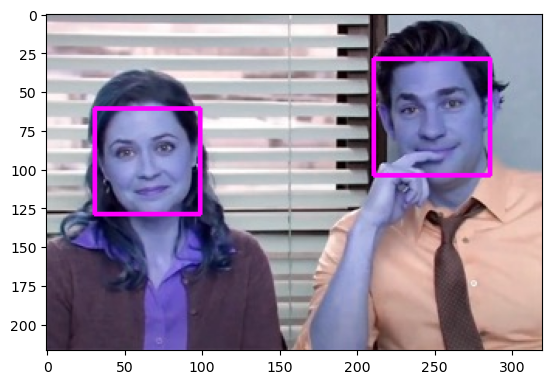

['Jim', 'Pam']
['tv', 'office', 'mirror', 'Copier', 'television']
../Data/Test_Images/Test_Image_19.jpeg
1/1 [==============================] - 0s 14ms/step


['Angela']
['drink', 'mug', 'milk', 'manager', 'art']
../Data/Test_Images/Test_Image_15.jpeg
1/1 [==============================] - 0s 13ms/step


['Pam']
['company', 'desk', 'manager', 'Copier', 'office']
../Data/Test_Images/Test_Image_7.jpeg
1/1 [==============================] - 0s 15ms/step


['Dwight', 'Jim']
['manager', 'office', 'Copier', 'company', 'group']
../Data/Test_Images/Test_Image_6.jpeg
1/1 [==============================] - 0s 19ms/step


['Jim', 'Dwight']
['computer', 'machine', 'Copier', 'company', 'office']
../Data/Test_Images/Test_Image_14.jpeg
1/1 [==============================] - 0s 15ms/step


['Pam', 'Jim', 'Jim', 'Dwight', 'Pam']
['bar', 'milk', 'proposal', 'phone', 'mirror']
../Data/Test_Images/test_image_18.jpeg
1/1 [==============================] - 0s 18ms/step


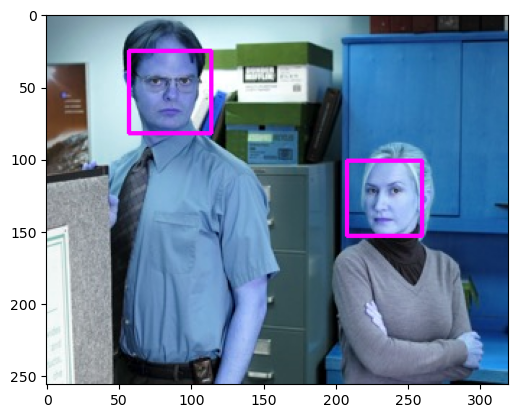

['Dwight', 'Angela']
['company', 'machine', 'group', 'computer', 'Copier']
../Data/Test_Images/Test_Image_13.jpeg
1/1 [==============================] - 0s 15ms/step


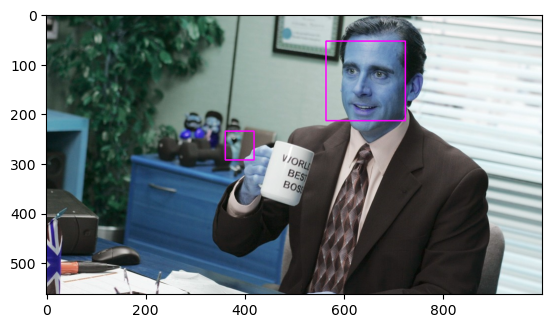

['Michael', 'Jim']
['Copier', 'computer', 'mug', 'office', 'manager']
../Data/Test_Images/Test_image_1.jpeg
1/1 [==============================] - 0s 12ms/step


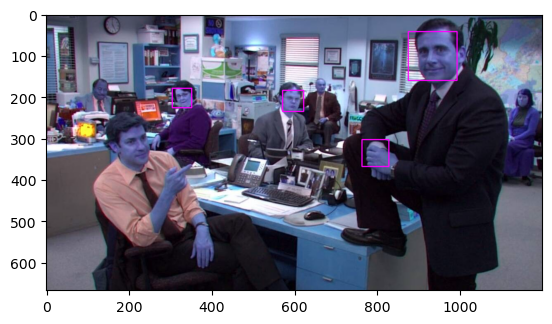

['Michael', 'Pam', 'Dwight', 'Jim']
['company', 'computer', 'manager', 'Copier', 'office']
../Data/Test_Images/Test_Image_12.jpeg
1/1 [==============================] - 0s 17ms/step


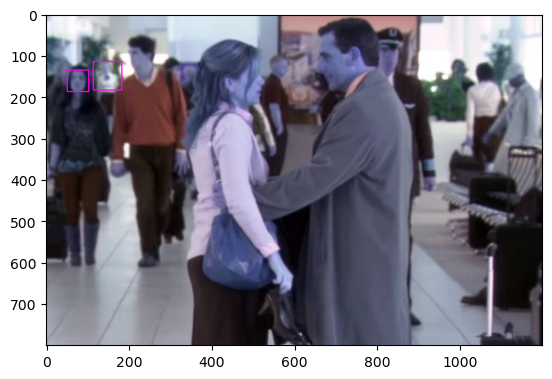

['Pam', 'Pam']
['mirror', 'art', 'milk', 'manager', 'proposal']


In [68]:


# for detecting faces
facecascade =  cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# change path if needed
test_path = '../Data/Test_Images'

for root, _, files in os.walk(test_path):
    for file in files:

        if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):
        # path of the image
        # print(path)
            path = os.path.join(root, file)
            print(path)
        else:
            continue



        label = os.path.basename(root).replace(" ", ".").lower()

        # load the image
        imgtest = cv2.imread(path, cv2.IMREAD_COLOR)
        image_array = np.array(imgtest, "uint8")

        # get the faces detected in the image
        all_faces = facecascade.detectMultiScale(imgtest, 
            scaleFactor=1.1, minNeighbors=5)

        # loop through each face and get each character
        character_vector = []
        for i in range(len(all_faces)):
            faces = [all_faces[i]]
            for (x_, y_, w, h) in faces:
                # draw the face detected
                face_detect = cv2.rectangle(
                    imgtest, (x_, y_), (x_+w, y_+h), (255, 0, 255), 2)

                # resize the detected face to 224x224
                size = (image_width, image_height)
                roi = image_array[y_: y_ + h, x_: x_ + w]
                resized_image = cv2.resize(roi, size)

                # prepare the image for prediction
                x = image.img_to_array(resized_image)
                x = np.expand_dims(x, axis=0)
                x = utils.preprocess_input(x, version=1)

                # making prediction
                predicted_prob = face_model.predict(x)
                character_vector += [class_list[predicted_prob[0].argmax()]]
                
        inputs = processor(text=nouns, images=imgtest, return_tensors="pt", padding=True)

        outputs = clip_model(**inputs)
        logits_per_image = outputs.logits_per_image # this is the image-text similarity score
        probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilitie
        #print(probs)
        #ind = torch.topk(probs.flatten(), 3).indices
        ind = probs.squeeze().argsort()[-5:]
        sentence = [data[k] for k in ind]
        plt.imshow(face_detect)
        plt.show()
        print(character_vector)
        print(sentence)